In [11]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from utils.preprocessing import load_and_clean_data
import numpy as np

# --- [1] Load & preproses data ---
df = load_and_clean_data('../data/bbca_stock_2019-2025.csv')
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']].values)

# --- [2] Buat data sequence ---
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_close)

# --- [3] Definisikan model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# --- [4] Early Stopping ---
early_stop = EarlyStopping(
    monitor='loss',          # bisa juga 'val_loss' jika pakai validation split
    patience=5,              # hentikan jika tidak membaik 5 epoch berturut-turut
    restore_best_weights=True
)

# --- [5] Training ---
model.fit(X, y, epochs=100, batch_size=32, callbacks=[early_stop])

# --- [6] Simpan model ---
os.makedirs("model", exist_ok=True)  # Ini memastikan folder "model" dibuat
model.save("model/lstm_model.h5") 



Epoch 1/100


c:\bbca-lstm-project\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0471
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0012
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.7322e-04
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.5672e-04
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 9.7742e-04
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 8.9611e-04
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0010
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 7.9719e-04
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 8.4055e-04
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 8.6539e-04
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 7.5934e-04
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 7.9602e-04
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 7.4106e-04
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 7.7499e-04
Epoch 15/100
44/44 ━━

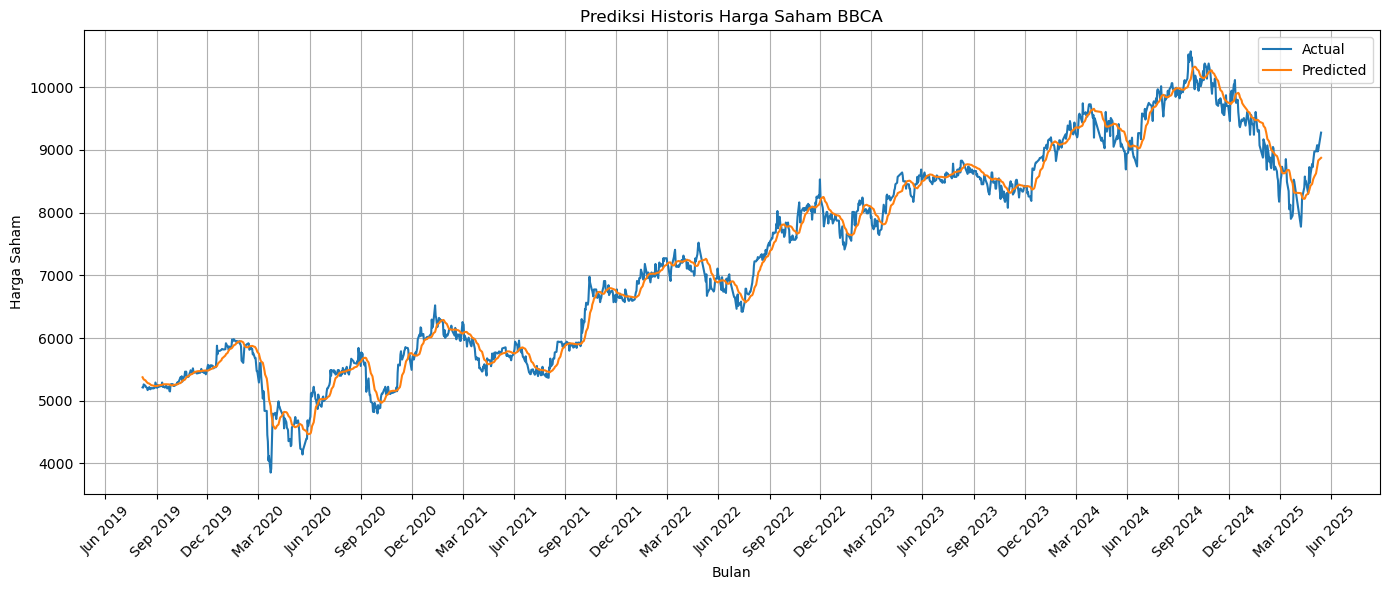

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ambil tanggal mulai dari index ke-60 (karena data sequence dimulai dari situ)
dates = df['Date'].iloc[60:].reset_index(drop=True)

# Buat dataframe prediksi
pred_df = pd.DataFrame({
    'Date': dates,
    'Actual': actual_actual.flatten(),
    'Predicted': predicted_actual.flatten()
})

# Visualisasi dengan format bulanan
plt.figure(figsize=(14, 6))
plt.plot(pred_df['Date'], pred_df['Actual'], label='Actual')
plt.plot(pred_df['Date'], pred_df['Predicted'], label='Predicted')
plt.title('Prediksi Historis Harga Saham BBCA')
plt.xlabel('Bulan')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)

# Format sumbu X sebagai bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. Jan 2022
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # tampilkan tiap 3 bulan
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

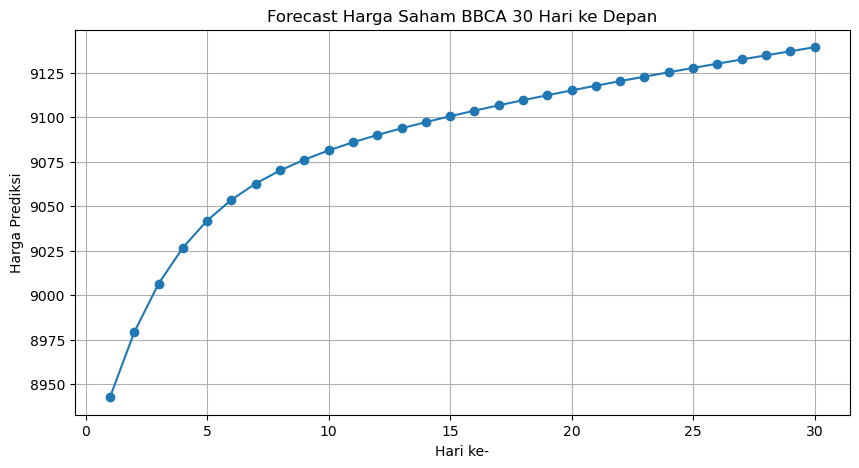

In [23]:
future_input = scaled_close[-60:].reshape(1, 60, 1)
future_preds = []

for _ in range(30):
    next_pred = model.predict(future_input)[0][0]
    future_preds.append(next_pred)
    
    # Geser window
    future_input = np.append(future_input[:, 1:, :], [[[next_pred]]], axis=1)

# Invers transform hasil prediksi ke nilai asli
future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Visualisasi hasil forecast
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), future_prices, marker='o')
plt.title('Forecast Harga Saham BBCA 30 Hari ke Depan')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Prediksi')
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import streamlit as st

rmse = np.sqrt(mean_squared_error(actual_actual, predicted_actual))
mae = mean_absolute_error(actual_actual, predicted_actual)

st.subheader("Evaluasi Akurasi")
st.write(f"**RMSE:** {rmse:.2f}")
st.write(f"**MAE:** {mae:.2f}")


2025-05-29 15:57:37.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 15:57:37.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 15:57:37.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 15:57:37.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 15:57:37.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 15:57:37.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
